In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# make a datagram with 2 columns:
# 1. primary capsule: (1), (2), (3), (4)
# 2. routing method: dynamic, fuzzy, ,max-min, em
# 3. Accuracy: float

# create a dataframe with all opossible combinations and random accuracy
acc = [[83.7, 82.18, 84.29, 80.1],
       [79.14, 79.57, 83.47, 83.06],
       [84.02, 80.37, 82.82, 83.84],
       [84.26, 81.76, 83.72, 80.89]
       ]

df = pd.DataFrame(columns=['primary capsule', 'routing method', 'accuracy'])
for i in range(1, 5):
    for j in ['dynamic', 'fuzzy', 'max-min', 'em']:
        new_row = {'primary capsule': f"method ({i})", 'routing method': j, 'accuracy': acc[i-1][['dynamic', 'fuzzy', 'max-min', 'em'].index(j)]}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [11]:
df

,primary capsule,routing method,accuracy
0,method (1),dynamic,83.70
1,method (1),fuzzy,82.18
2,method (1),max-min,84.29
3,method (1),em,80.10
4,method (2),dynamic,79.14
5,method (2),fuzzy,79.57
6,method (2),max-min,83.47
7,method (2),em,83.06
8,method (3),dynamic,84.02
9,method (3),fuzzy,80.37


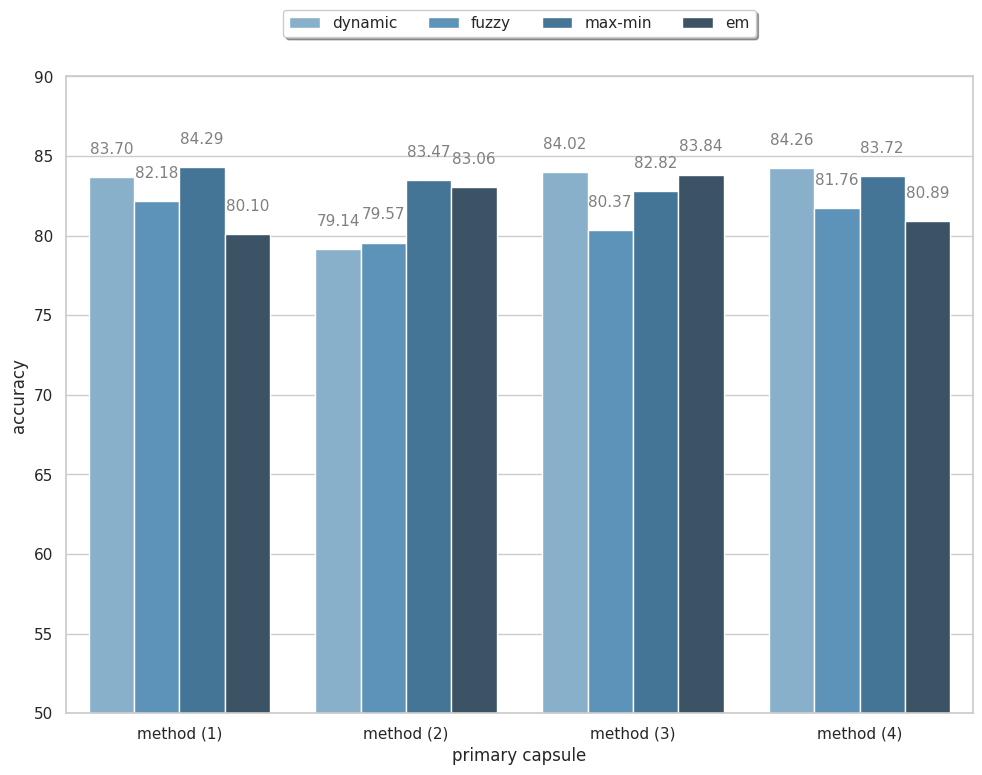

In [26]:
# draw a bar plot with seaborn for df where accuracy axis starts from 50 to 90
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="primary capsule", y="accuracy", hue="routing method", data=df, palette="Blues_d")
ax.set(ylim=(50, 90))
# add labels to each bar
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
        textcoords='offset points')
# legend position inside the plot frame
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.show()